## A different approach
The steps in doing data cleanup with some examples have been done in great detail in the Linear Regression  Data Cleanup.

In this dataset most of the cleanup is in the strings in the columns names.
Other than that there is nothing of major significance.
Changing column names is something we attempt here as well so the lessons will be useful.

In this exercise we are going to do something quite different, something more daring and more educational than the traditional data cleanup.  We are going to avoid the process of cleaning up the column names entirely.  We are just going to rename them x0,x1,...
all the way to x516, keeping x562 and 563 as 'subject' and 'activity'.  

Then we are going to use a black box approach to Random Forests, i.e. one where we dont really understand the variables and the model but we can do useful things anyway. Then we will see what we get as the top 10 variables and compare with the previous approach.

This will allow use to compare and contrast the two methods - one where we used a lot of domain knowledge, the other this one, where we use a 'black box' approach.

In practice we prefer the former approach but it is useful to see the latter in action as well.

In [1]:
%pylab inline
import pandas as pd
from numpy import nan as NA
samsungdata = pd.read_csv('../datasets/samsung/samsungdata.csv')

Populating the interactive namespace from numpy and matplotlib


In [6]:
len(samsungdata.columns)

564

In [9]:
samsungdata.columns[-2:]

Index([subject, activity], dtype=object)

In [10]:
sambak = samsungdata # make a copy and experiment on it not the original

In [12]:
sambak.columns[0]

'Unnamed: 0'

In [16]:
cols=list(sambak.columns) # get the columns names and coerce to a mutable list. A pandas index is immutable.

In [17]:
cols[0] = 'Renamed'

In [18]:
cols[0:5]

['Renamed',
 'tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X']

In [35]:
newcols = [ "x%d"%(k) for k in range(0,len(cols)) ] # make a list with a new set of column names

In [20]:
newcols[0:5]

['x0', 'x1', 'x2', 'x3', 'x4']

In [25]:
newcols[-2:]

['x562', 'x563']

In [28]:
newcols[-1]

'x563'

In [36]:
newcols[-2:] = cols[-2:] # replace the last two items with the human readable column names from the original dataset

In [30]:
newcols[-2:]

['subject', 'activity']

In [37]:
sambak.columns = newcols # replace the orig columns with newcols

In [38]:
sambak.columns[0] # check the name

'x0'

In [39]:
sambak['x0']  # check the value - this is the row index

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
...
7337    7338
7338    7339
7339    7340
7340    7341
7341    7342
7342    7343
7343    7344
7344    7345
7345    7346
7346    7347
7347    7348
7348    7349
7349    7350
7350    7351
7351    7352
Name: x0, Length: 7352, dtype: int64

In [49]:
sambak2=sambak[sambak.columns[1:-2]] # drop the first column and the last two columns to get the independent vars

In [54]:
sambak2['x1'] # check to see it's there

0     0.288585
1     0.278419
2     0.279653
3     0.279174
4     0.276629
5     0.277199
6     0.279454
7     0.277432
8     0.277293
9     0.280586
10    0.276880
11    0.276228
12    0.278457
13    0.277175
14    0.297946
...
7337    0.278414
7338    0.344757
7339    0.326647
7340    0.223283
7341    0.363768
7342    0.276137
7343    0.294230
7344    0.221206
7345    0.207861
7346    0.237966
7347    0.299665
7348    0.273853
7349    0.273387
7350    0.289654
7351    0.351503
Name: x1, Length: 7352, dtype: float64

Try this:

sambak2['x0']  # we want this to fail and give an exception like

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-52-a199ccf2be41> in <module>()
----> 1 sambak2['x0']  # check

/Applications/anaconda15/lib/python2.7/site-packages/pandas/core/frame.pyc in __getitem__(self, key)
   1926         else:
   1927             # get column
-> 1928             return self._get_item_cache(key)
   1929 
   1930     def _getitem_slice(self, key):

/Applications/anaconda15/lib/python2.7/site-packages/pandas/core/generic.pyc in _get_item_cache(self, item)
    568             return cache[item]
    569         except Exception:
--> 570             values = self._data.get(item)
    571             res = self._box_item_values(item, values)
    572             cache[item] = res

/Applications/anaconda15/lib/python2.7/site-packages/pandas/core/internals.pyc in get(self, item)
   1381 
   1382     def get(self, item):
-> 1383         _, block = self._find_block(item)
   1384         return block.get(item)
   1385 

/Applications/anaconda15/lib/python2.7/site-packages/pandas/core/internals.pyc in _find_block(self, item)
   1523 
   1524     def _find_block(self, item):
-> 1525         self._check_have(item)
   1526         for i, block in enumerate(self.blocks):
   1527             if item in block:

/Applications/anaconda15/lib/python2.7/site-packages/pandas/core/internals.pyc in _check_have(self, item)
   1530     def _check_have(self, item):
   1531         if item not in self.items:
-> 1532             raise KeyError('no item named %s' % com.pprint_thing(item))
   1533 
   1534     def reindex_axis(self, new_axis, method=None, axis=0, copy=True):

KeyError: u'no item named x0'

In [55]:
sambak2[sambak2.columns[-1]] # want to check what the last columns is

0    -0.058627
1    -0.054317
2    -0.049118
3    -0.047663
4    -0.043892
5    -0.042126
6    -0.043010
7    -0.041976
8    -0.037364
9    -0.034417
10   -0.034681
11   -0.035852
12   -0.035998
13   -0.035063
14    0.036444
...
7337    0.043458
7338    0.040161
7339    0.023146
7340    0.014452
7341    0.016289
7342   -0.005105
7343   -0.001647
7344    0.009538
7345    0.027878
7346    0.048907
7347    0.049819
7348    0.050053
7349    0.040811
7350    0.025339
7351    0.036695
Name: x561, Length: 7352, dtype: float64

In [56]:
samsungdata['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
dtype: int64

In [57]:
samsungdata['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [59]:
samtest = samsungdata[samsungdata['subject'] >= 27]

In [60]:
samtrain = samsungdata[samsungdata['subject'] <= 6]

In [66]:
samval2 = samsungdata[samsungdata['subject'] < 27]

In [68]:
samval = samval2[samsungdata['subject'] >= 21 ]

In [69]:
samval['subject'].unique()

array([21, 22, 23, 25, 26])

In [70]:
samtrain['subject'].unique()

array([1, 3, 5, 6])

In [71]:
samtest['subject'].unique()

array([27, 28, 29, 30])

Now we are ready to create the model, validate and test it.

In [72]:
import randomforests as rf
samtrain = rf.remap_col(samtrain,'activity')
samval = rf.remap_col(samval,'activity')
samtest = rf.remap_col(samtest,'activity')

In [73]:
samtrain['activity'].unique()

array([3, 2, 1, 4, 6, 5])

In [103]:
import sklearn.ensemble as sk
rfc = sk.RandomForestClassifier(n_estimators=50, compute_importances=True, oob_score=True)
train_data = samtrain[samtrain.columns[1:-2]]
train_truth = samtrain['activity']
model = rfc.fit(train_data, train_truth)

In [104]:
rfc.oob_score_

0.98403041825095061

In [120]:
fi = enumerate(rfc.feature_importances_)
cols = samtrain.columns
[(value,cols[i]) for (i,value) in fi if value > 0.017]

[(0.036111205314263831, 'x41'),
 (0.022944421102129454, 'x49'),
 (0.036627075843360363, 'x50'),
 (0.01969226434644121, 'x52'),
 (0.047155838268418251, 'x53'),
 (0.020936155077376319, 'x56'),
 (0.030973069486755728, 'x57'),
 (0.018972471372629626, 'x344'),
 (0.017855365021638578, 'x558'),
 (0.038597146390154873, 'x559')]

In [124]:
fi = enumerate(rfc.feature_importances_)
cols = samtrain.columns
top10 = [(cols[i]) for (i,value) in fi if value > 0.017]

In [125]:
top10

['x41', 'x49', 'x50', 'x52', 'x53', 'x56', 'x57', 'x344', 'x558', 'x559']

So here we see a set of top 10 features but we have absolutely no idea what they are or mean.
We came at the 0.17 figure by trial and error, adjusting until we got 10.  The number here is 0.17. But the number in the earlier meathod was 0.04. What does this mean?  
Since we are using many more features (all of them actually) the importance meausre is spread more widely, so individual importance scores are smaller.  But we can still rank them and pick the top 10.

In [113]:
# pandas data frame adds a spurious unknown column in 0 position hence starting at col 1
# not using subject column, activity ie target is in last columns hence -2 i.e dropping last 2 cols

val_data = samval[samval.columns[1:-2]]
val_truth = samval['activity']
val_pred = rfc.predict(val_data)

test_data = samtest[samtest.columns[1:-2]]
test_truth = samtest['activity']
test_pred = rfc.predict(test_data)

In [114]:
print("mean accuracy score for validation set = %f" %(rfc.score(val_data, val_truth)))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_truth)))

mean accuracy score for validation set = 0.860673
mean accuracy score for test set = 0.919192


In [115]:
import sklearn.metrics as skm
test_cm = skm.confusion_matrix(test_truth,test_pred)

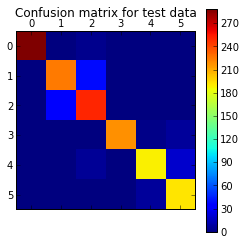

In [116]:
import pylab as pl
pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()

As before, we now compute some commonly used measures of prediction "goodness". 

In [117]:
# Accuracy
print("Accuracy = %f" %(skm.accuracy_score(test_truth,test_pred)))
# Precision
print("Precision = %f" %(skm.precision_score(test_truth,test_pred)))
# Recall
print("Recall = %f" %(skm.recall_score(test_truth,test_pred)))
# F1 Score
print("F1 score = %f" %(skm.f1_score(test_truth,test_pred)))

Accuracy = 0.919192
Precision = 0.921428
Recall = 0.919192
F1 score = 0.919609


As we somewhat expected this model is more accurate.  
BUT ...  
we have no idea what the variables are and we gain no knowledeg or intuition from this model.


HOWEVER ...
We did save a lot of tedious work wrangling text columns.
Perhaps we could go bacj and try to understand these features by mapping back to the original dataset and extracting these columns.



In [126]:
origindx = [int(x[1:]) for x in top10]

In [127]:
origindx


[41, 49, 50, 52, 53, 56, 57, 344, 558, 559]

In [128]:
samsungdata.columns[origindx]

Index([x41, x49, x50, x52, x53, x56, x57, x344, x558, x559], dtype=object)

In [129]:
samorig = pd.read_csv('../datasets/samsung/samsungdata.csv')

In [130]:
samorig.columns[origindx]

Index([tGravityAcc-mean()-X, tGravityAcc-mad()-Z, tGravityAcc-max()-X, tGravityAcc-max()-Z, tGravityAcc-min()-X, tGravityAcc-sma(), tGravityAcc-energy()-X, fBodyAcc-bandsEnergy()-25,48.2, angle(tBodyGyroJerkMean,gravityMean), angle(X,gravityMean)], dtype=object)

So these are the columns names in the raw data set. But still we have no immediate intuition about the project.